# Webscraping of Understat using Selenium 


**By Jose Gonzalez**

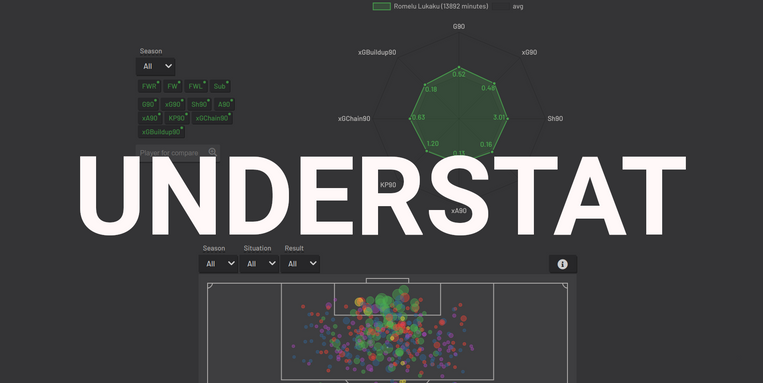


<a id="1."></a>
# 1. Introduction 

This is the beggining of my Understat series in which I intent to using 3 different methods to scrape data from [Understat](https://understat.com/) using Selenium, The Understat module created by [Amos Sebastian](https://understat.readthedocs.io/en/latest/) and Beautiful Soup, heavily inspired by McKay [Johns tutorials](https://www.youtube.com/c/mckayjohns). After scraping the data from Understat, I intent to plot it by using [mplsoccer libray](https://mplsoccer.readthedocs.io/en/latest/gallery/index.html), perform analysis based off xG data scraped as well creating our own shotmaps and plot starting from scratch.

This notebook's made to scrape football statistics from the incredible webpage Understat using **Selenium**

<a id="1.1"></a>
## 1.1.  Notebook content

* [1. Introduction](#1.)
    - [1.1. Notebook Content.](#1.1)
* [2.Importing libraries.](#2.)
* [3.Player data.](#3.)
    - [3.1. Player grouped stat.](#3.1)
    - [3.2. Shot data.](#3.2)
    - [3.3. Match data.](#3.3)
    - [3.4. Radar data.](#3.4)
* [4. Match data](#4.)
    - [4.1. Shot data.](#4.1)
    - [4.2. Match stats](#4.2)
    - [4.3. Player match info](#4.3)
* [5. Get fixtures](#5.)
* [6. Get table](#6.)
* [7. Scrape Bundesliga rosters](#7.)


<a id="2."></a>
# 2. Importing libraries.

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as sc
from selenium.webdriver.common.by import By
import pandas as pd
# The driver must be in the same folder as your notebook
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')


<a id="3."></a>

# 3. Player data 

In this section we'll focus on the stats available to scrape from Understat using the player's ID.

<a id="3.1"></a>
## 3.1. Grouped stats

Let's start by scraping a Haaland's grouped stats such as displayed in Understat's webpage 

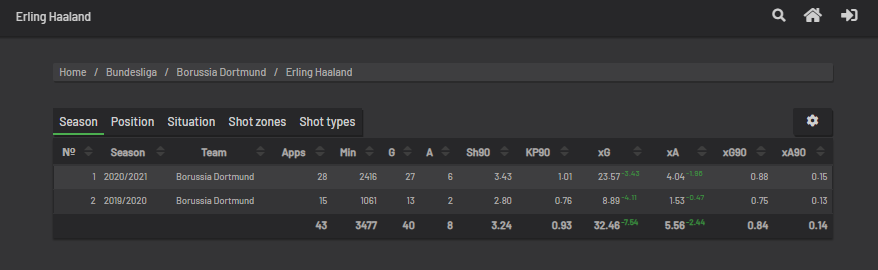




In Understat website each player's assigned a unique ID in this case for Halaand, it's number 8260

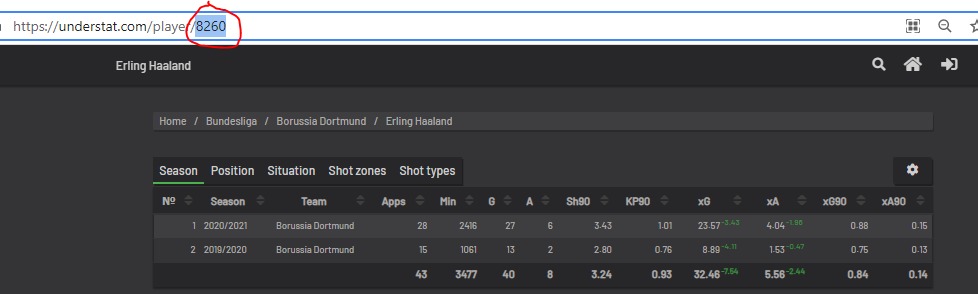

Now to start scraping we select the exact location of our driver in our PC file path

Then it is necessary to copy and paste the link for our the driver to get it
Finally we must select what script to execute, for it 
    1.Click right and select inspect
    2.Go to sources
    3.Reload the page to obatain the page's code and CRTL F for "groupsData" which is the script to execute

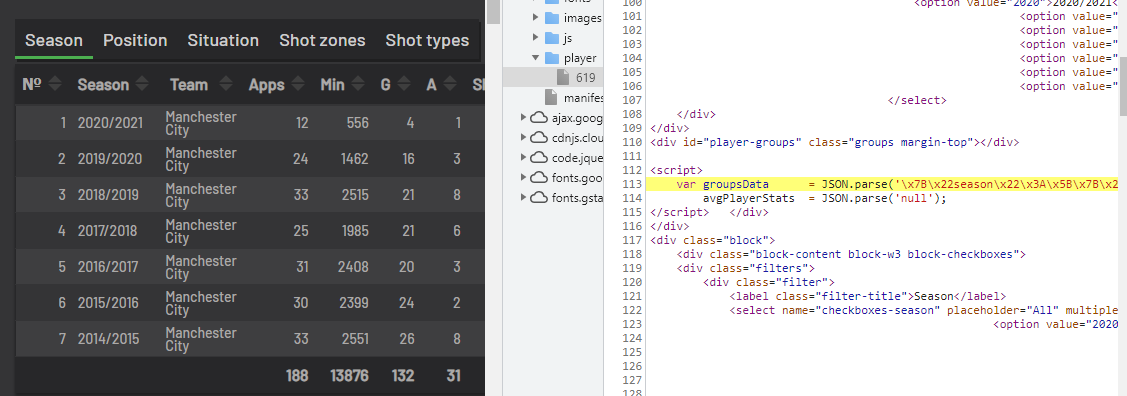 

In **beautiful soup** we'd execute scripts by number [1],[2] instead the variable contained in that script

In [3]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/player/8260"
driver.get(link)
# select the match data 
haaland_stats = driver.execute_script('return groupsData;')
# close the driver 
driver.close()

Once the data's been scraped let's check it out to determine the path forward

In [4]:
# First let's check the json data obtained
haaland_stats

{'position': {'2019': {'FW': {'assists': '2',
    'games': '11',
    'goals': '7',
    'key_passes': '9',
    'npg': '7',
    'npxG': '5.980199322104454',
    'position': 'FW',
    'red': '0',
    'season': '2019',
    'shots': '24',
    'time': '949',
    'xA': '1.5264748334884644',
    'xG': '5.980199322104454',
    'xGBuildup': '2.9617723943665624',
    'xGChain': '8.433824225328863',
    'yellow': '0'},
   'Sub': {'assists': '0',
    'games': '4',
    'goals': '6',
    'key_passes': '0',
    'npg': '6',
    'npxG': '2.9091462530195713',
    'position': 'Sub',
    'red': '0',
    'season': '2019',
    'shots': '9',
    'time': '112',
    'xA': '0',
    'xG': '2.9091462530195713',
    'xGBuildup': '0.023214096203446388',
    'xGChain': '2.932360354810953',
    'yellow': '0'}},
  '2020': {'FW': {'assists': '5',
    'games': '27',
    'goals': '27',
    'key_passes': '25',
    'npg': '25',
    'npxG': '20.161050744354725',
    'position': 'FW',
    'red': '0',
    'season': '2020',
   

We realized the data is a dictionary type with several different keys 


We cannot merge the json data into a DataFrame just yet due to the nested dictionaries that would draw an error such as "Mixing dicts with non-Series may lead to ambiguous ordering"

In [5]:
pd.DataFrame(haaland_stats)

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

Once we've seen the impossibility on creating a df right the way let's explore the dictionary keys

In [6]:
# let's explore the keys of the dictionary
haaland_stats.keys()

dict_keys(['position', 'season', 'shotTypes', 'shotZones', 'situation'])

Now we are able to create a DataFrame from those five keys,position', 'season', 'shotTypes', 'shotZones', 'situation'

In [7]:
pd.DataFrame(haaland_stats['shotTypes'])

,2019,2020
Head,"{'assists': '0', 'goals': '1', 'key_passes': '...","{'assists': '0', 'goals': '1', 'key_passes': '..."
LeftFoot,"{'assists': '2', 'goals': '9', 'key_passes': '...","{'assists': '2', 'goals': '24', 'key_passes': ..."
RightFoot,"{'assists': '0', 'goals': '3', 'key_passes': '...","{'assists': '4', 'goals': '2', 'key_passes': '..."


As it is still nested, it's necessary to expand them using the apply series function to visualize them better

In [8]:
# First we create the DataFrame 
haaland_shot_types = pd.DataFrame(haaland_stats['shotTypes'])
# using apply series to expand the dictionary and easily access the 2020/2021 season for Erling Haaland shotTypes
haaland_shot_types['2020'].apply(pd.Series)

,assists,goals,key_passes,npg,npxG,season,shotTypes,shots,xA,xG
Head,0,1,1,1,1.1343208346515894,2020,Head,10,0.03377284109592438,1.1343208346515894
LeftFoot,2,24,9,22,16.64116094261408,2020,LeftFoot,73,2.056737344712019,19.67226765304804
RightFoot,4,2,17,2,2.763955272734165,2020,RightFoot,9,1.9449397046118975,2.763955272734165


We can also merge both years into a single DataFrame using the append function

In [9]:
# Merging the 2021 and the 2020 season into a single DataFrame for Erling Haaland 
haaland_shot_types['2020'].apply(pd.Series).append(haaland_shot_types['2019'].apply(pd.Series))

,assists,goals,key_passes,npg,npxG,season,shotTypes,shots,xA,xG
Head,0,1,1,1,1.1343208346515894,2020,Head,10,0.03377284109592438,1.1343208346515894
LeftFoot,2,24,9,22,16.64116094261408,2020,LeftFoot,73,2.056737344712019,19.67226765304804
RightFoot,4,2,17,2,2.763955272734165,2020,RightFoot,9,1.9449397046118975,2.763955272734165
Head,0,1,0,1,0.16594494134187698,2019,Head,2,0,0.16594494134187698
LeftFoot,2,9,5,9,6.092655889689922,2019,LeftFoot,26,1.3237233310937881,6.092655889689922
RightFoot,0,3,4,3,2.6307445615530014,2019,RightFoot,5,0.2027514986693859,2.6307445615530014


And now we have a df we can work with ease , the same case is applied to the other keys such as season, shotZones, situation and positions. 

Some keys such as 'season' don't require more unnesting 

In [10]:
pd.DataFrame(haaland_stats['season'])

,assists,games,goals,key_passes,npg,npxG,position,red,season,shots,team,time,xA,xG,xGBuildup,xGChain,yellow
0,6,28,27,27,25,20.53943706303835,FW,0,2020,92,Borussia Dortmund,2416,4.035449907183647,23.57054380327463,5.896184146404266,27.197274826467037,2
1,2,15,13,9,13,8.889345575124025,Sub,0,2019,33,Borussia Dortmund,1061,1.5264748334884644,8.889345575124025,2.9849864905700088,11.366184580139816,0


---

<a id="3.2"></a>
##  3.2. Shot data

Contrary to the **grouped stats** , **players shot data** is not nested into dictionaries , therefore we are able to create a DataFrame directly, following the same procedure except we proceed to select the **shotsData** variable instead of the **groupedStats**

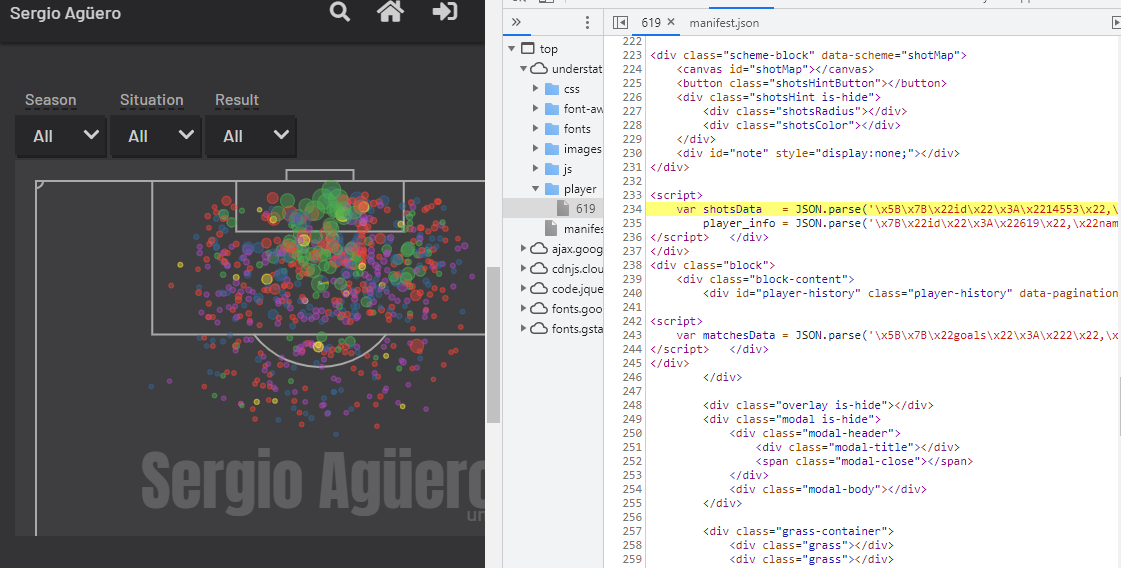

In [11]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/player/8260"
driver.get(link)
# select the shot data 
haaland_shots = driver.execute_script('return shotsData;')
# close the driver 
driver.close()

In [12]:
haaland_shots

[{'X': '0.8880000305175781',
  'Y': '0.6659999847412109',
  'a_goals': '5',
  'a_team': 'Borussia Dortmund',
  'date': '2020-01-18 14:30:00',
  'h_a': 'a',
  'h_goals': '3',
  'h_team': 'Augsburg',
  'id': '354876',
  'lastAction': 'Throughball',
  'match_id': '12562',
  'minute': '58',
  'player': 'Erling Haaland',
  'player_assisted': 'Jadon Sancho',
  'player_id': '8260',
  'result': 'Goal',
  'season': '2019',
  'shotType': 'LeftFoot',
  'situation': 'OpenPlay',
  'xG': '0.07933320105075836'},
 {'X': '0.98',
  'Y': '0.48900001525878906',
  'a_goals': '5',
  'a_team': 'Borussia Dortmund',
  'date': '2020-01-18 14:30:00',
  'h_a': 'a',
  'h_goals': '3',
  'h_team': 'Augsburg',
  'id': '354881',
  'lastAction': 'Pass',
  'match_id': '12562',
  'minute': '69',
  'player': 'Erling Haaland',
  'player_assisted': 'Thorgan Hazard',
  'player_id': '8260',
  'result': 'Goal',
  'season': '2019',
  'shotType': 'LeftFoot',
  'situation': 'OpenPlay',
  'xG': '0.9206209778785706'},
 {'X': '0.883

In [13]:
df = pd.DataFrame(haaland_shots)
df

,X,Y,a_goals,a_team,date,h_a,h_goals,h_team,id,lastAction,match_id,minute,player,player_assisted,player_id,result,season,shotType,situation,xG
0,0.8880000305175781,0.6659999847412109,5,Borussia Dortmund,2020-01-18 14:30:00,a,3,Augsburg,354876,Throughball,12562,58,Erling Haaland,Jadon Sancho,8260,Goal,2019,LeftFoot,OpenPlay,0.07933320105075836
1,0.98,0.48900001525878906,5,Borussia Dortmund,2020-01-18 14:30:00,a,3,Augsburg,354881,Pass,12562,69,Erling Haaland,Thorgan Hazard,8260,Goal,2019,LeftFoot,OpenPlay,0.9206209778785706
2,0.8830000305175781,0.34700000762939454,5,Borussia Dortmund,2020-01-18 14:30:00,a,3,Augsburg,354883,Throughball,12562,78,Erling Haaland,Marco Reus,8260,Goal,2019,LeftFoot,OpenPlay,0.3228312134742737
3,0.8859999847412109,0.639000015258789,1,FC Cologne,2020-01-24 19:30:00,h,5,Borussia Dortmund,355527,Pass,12566,65,Erling Haaland,Jadon Sancho,8260,BlockedShot,2019,LeftFoot,OpenPlay,0.1191810667514801
4,0.955,0.495,1,FC Cologne,2020-01-24 19:30:00,h,5,Borussia Dortmund,355531,Rebound,12566,76,Erling Haaland,None,8260,Goal,2019,LeftFoot,OpenPlay,0.746640682220459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.950999984741211,0.53,2,Borussia Dortmund,2021-04-24 13:30:00,a,0,Wolfsburg,417187,Cross,15413,72,Erling Haaland,Marco Reus,8260,MissedShots,2020,Head,SetPiece,0.1365557610988617
121,0.909000015258789,0.40400001525878904,3,Borussia Dortmund,2021-05-16 16:00:00,a,1,Mainz 05,422481,Rebound,15434,45,Erling Haaland,None,8260,BlockedShot,2020,LeftFoot,FromCorner,0.09731756150722504
122,0.9130000305175782,0.6580000305175782,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423631,Throughball,15438,4,Erling Haaland,Reinier,8260,Goal,2020,LeftFoot,OpenPlay,0.1182284951210022
123,0.8819999694824219,0.590999984741211,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423649,Pass,15438,71,Erling Haaland,Nico Schulz,8260,MissedShots,2020,LeftFoot,OpenPlay,0.12711219489574432


Now we have the entire shot data for Haaland's 2 years at Dortmund

**Filtering the shot data**

If want it it's possible to filter the data in a way to make it easier to analyze 

In [14]:
# Filtering Haaland's goals assisted by Jadon Sancho
df_sancho = df[df['player_assisted']=='Jadon Sancho']
# Filtering Haaland's shot data against Wolfsburg 
df_wolfs = df[(df['h_team']=='Wolfsburg')|(df['a_team']=='Wolfsburg')]

In [15]:
# displaying both dataframes
print('Shots assisted by Sancho')
display(df_sancho)
print('Agains Wolfsburg')
display(df_wolfs)

Shots assisted by Sancho


,X,Y,a_goals,a_team,date,h_a,h_goals,h_team,id,lastAction,match_id,minute,player,player_assisted,player_id,result,season,shotType,situation,xG
0,0.8880000305175781,0.6659999847412109,5,Borussia Dortmund,2020-01-18 14:30:00,a,3,Augsburg,354876,Throughball,12562,58,Erling Haaland,Jadon Sancho,8260,Goal,2019,LeftFoot,OpenPlay,0.07933320105075836
3,0.8859999847412109,0.639000015258789,1,FC Cologne,2020-01-24 19:30:00,h,5,Borussia Dortmund,355527,Pass,12566,65,Erling Haaland,Jadon Sancho,8260,BlockedShot,2019,LeftFoot,OpenPlay,0.1191810667514801
8,0.9359999847412109,0.695,3,Borussia Dortmund,2020-02-08 17:30:00,a,4,Bayer Leverkusen,358133,Pass,12584,18,Erling Haaland,Jadon Sancho,8260,SavedShot,2019,LeftFoot,OpenPlay,0.0589698925614357
9,0.9269999694824219,0.4540000152587891,3,Borussia Dortmund,2020-02-08 17:30:00,a,4,Bayer Leverkusen,358150,Aerial,12584,84,Erling Haaland,Jadon Sancho,8260,MissedShots,2019,Head,FromCorner,0.04765165597200394
10,0.8980000305175782,0.7019999694824218,0,Eintracht Frankfurt,2020-02-14 19:30:00,h,4,Borussia Dortmund,358721,Pass,12592,35,Erling Haaland,Jadon Sancho,8260,BlockedShot,2019,LeftFoot,OpenPlay,0.06186603382229805
18,0.9130000305175782,0.62,2,Borussia Dortmund,2020-03-07 17:30:00,a,1,Borussia M.Gladbach,361841,Pass,12621,85,Erling Haaland,Jadon Sancho,8260,MissedShots,2019,LeftFoot,OpenPlay,0.41355711221694946
33,0.9059999847412109,0.5059999847412109,0,Borussia M.Gladbach,2020-09-19 16:30:00,h,3,Borussia Dortmund,377669,Chipped,14179,20,Erling Haaland,Jadon Sancho,8260,SavedShot,2020,Head,SetPiece,0.07609743624925613
37,0.9269999694824219,0.575,0,Borussia M.Gladbach,2020-09-19 16:30:00,h,3,Borussia Dortmund,377683,Pass,14179,76,Erling Haaland,Jadon Sancho,8260,Goal,2020,LeftFoot,OpenPlay,0.46304914355278015
39,0.919000015258789,0.38299999237060545,0,Borussia Dortmund,2020-09-26 13:30:00,a,2,Augsburg,378809,Throughball,14184,88,Erling Haaland,Jadon Sancho,8260,SavedShot,2020,RightFoot,OpenPlay,0.31046539545059204
48,0.9419999694824219,0.34799999237060547,0,Schalke 04,2020-10-24 16:30:00,h,3,Borussia Dortmund,383469,TakeOn,15181,60,Erling Haaland,Jadon Sancho,8260,Goal,2020,RightFoot,OpenPlay,0.35884201526641846


Agains Wolfsburg


,X,Y,a_goals,a_team,date,h_a,h_goals,h_team,id,lastAction,match_id,minute,player,player_assisted,player_id,result,season,shotType,situation,xG
63,0.7569999694824219,0.6509999847412109,0,Wolfsburg,2021-01-03 14:30:00,h,2,Borussia Dortmund,396892,Pass,15258,27,Erling Haaland,Mats Hummels,8260,SavedShot,2020,LeftFoot,OpenPlay,0.022559810429811478
64,0.9259999847412109,0.5659999847412109,0,Wolfsburg,2021-01-03 14:30:00,h,2,Borussia Dortmund,396894,Cross,15258,38,Erling Haaland,Marco Reus,8260,MissedShots,2020,Head,SetPiece,0.104659304022789
65,0.8730000305175781,0.6419999694824219,0,Wolfsburg,2021-01-03 14:30:00,h,2,Borussia Dortmund,396896,BallRecovery,15258,46,Erling Haaland,Thomas Delaney,8260,SavedShot,2020,LeftFoot,OpenPlay,0.06805717200040817
66,0.8730000305175781,0.6179999923706054,0,Wolfsburg,2021-01-03 14:30:00,h,2,Borussia Dortmund,396899,Throughball,15258,52,Erling Haaland,Raphael Guerreiro,8260,SavedShot,2020,LeftFoot,OpenPlay,0.32988134026527405
116,0.914000015258789,0.35,2,Borussia Dortmund,2021-04-24 13:30:00,a,0,Wolfsburg,417168,BallRecovery,15413,11,Erling Haaland,None,8260,Goal,2020,LeftFoot,OpenPlay,0.3355064392089844
117,0.89,0.5109999847412109,2,Borussia Dortmund,2021-04-24 13:30:00,a,0,Wolfsburg,417175,Cross,15413,43,Erling Haaland,Raphael Guerreiro,8260,MissedShots,2020,LeftFoot,OpenPlay,0.10618335753679276
118,0.885,0.6430000305175781,2,Borussia Dortmund,2021-04-24 13:30:00,a,0,Wolfsburg,417179,Pass,15413,49,Erling Haaland,Jadon Sancho,8260,SavedShot,2020,LeftFoot,OpenPlay,0.08762162178754807
119,0.8440000152587891,0.504000015258789,2,Borussia Dortmund,2021-04-24 13:30:00,a,0,Wolfsburg,417186,Pass,15413,67,Erling Haaland,Mahmoud Dahoud,8260,Goal,2020,LeftFoot,OpenPlay,0.3223724961280823
120,0.950999984741211,0.53,2,Borussia Dortmund,2021-04-24 13:30:00,a,0,Wolfsburg,417187,Cross,15413,72,Erling Haaland,Marco Reus,8260,MissedShots,2020,Head,SetPiece,0.1365557610988617


---

<a id="3.3"></a>
## 3.3.  Players complete matches data

Let's proceed to scrape the entire matches data for Haaland's career at Dortmund, selecting the variable matchesData instead of shotsData

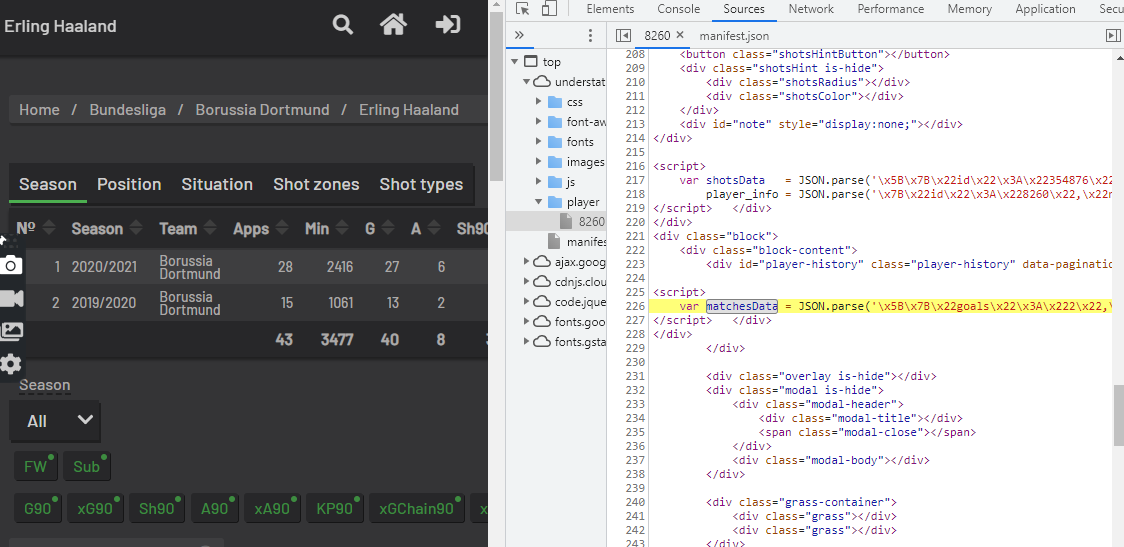 



In [16]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/player/8260"
driver.get(link)
# select the shot data 
haaland_matches_data = driver.execute_script('return matchesData;')
# close the driver 
driver.close()

Same case as **shotsData**, the data is not nested , therefore it's possible to create a DataFrame directly

In [17]:
df = pd.DataFrame(haaland_matches_data)
df

,a_goals,a_team,assists,date,goals,h_goals,h_team,id,key_passes,npg,npxG,position,roster_id,season,shots,time,xA,xG,xGBuildup,xGChain
0,1,Bayer Leverkusen,0,2021-05-22,2,3,Borussia Dortmund,15438,1,2,1.1192399263381958,FW,472859,2020,3,90,0.10691629350185394,1.1192399263381958,0,1.226156234741211
1,3,Borussia Dortmund,1,2021-05-16,0,1,Mainz 05,15434,1,0,0.09731756150722504,FW,471524,2020,1,90,0.846783459186554,0.09731756150722504,0,0.846783459186554
2,2,Borussia Dortmund,0,2021-04-24,2,0,Wolfsburg,15413,0,2,0.9882397055625916,FW,465296,2020,5,90,0,0.9882397055625916,0,0.8516839146614075
3,0,Union Berlin,0,2021-04-21,0,2,Borussia Dortmund,15402,2,0,2.2122836112976074,FW,464346,2020,6,90,0.0891181081533432,2.970060348510742,1.2776492834091187,2.56215500831604
4,1,Werder Bremen,0,2021-04-18,2,4,Borussia Dortmund,15392,2,1,0.8309696316719055,FW,463589,2020,5,90,0.13668884336948395,1.5887463092803955,0.07669726759195328,0.9676584601402283
5,3,Borussia Dortmund,1,2021-04-10,0,2,VfB Stuttgart,15391,2,0,0.10602525621652603,FW,461355,2020,1,90,0.12299048155546188,0.10602525621652603,0.23108847439289093,0.3540789484977722
6,2,Eintracht Frankfurt,0,2021-04-03,0,1,Borussia Dortmund,15374,0,0,0.8736405968666077,FW,459594,2020,4,90,0,0.8736405968666077,0,0.8736405968666077
7,2,Borussia Dortmund,0,2021-03-20,2,2,FC Cologne,15371,1,2,1.2976435422897339,FW,458048,2020,5,90,0.06558983772993088,1.2976435422897339,0,1.3632333278656006
8,0,Hertha Berlin,0,2021-03-13,0,2,Borussia Dortmund,15356,0,0,0.08047280460596085,FW,456523,2020,1,90,0,0.08047280460596085,0.7500041723251343,0.7500041723251343
9,2,Borussia Dortmund,0,2021-03-06,2,4,Bayern Munich,15351,0,2,0.6880267858505249,FW,454830,2020,2,62,0,0.6880267858505249,0,0.6880267858505249


---

<a id="3.4"></a>
## 3.4. Players radar data

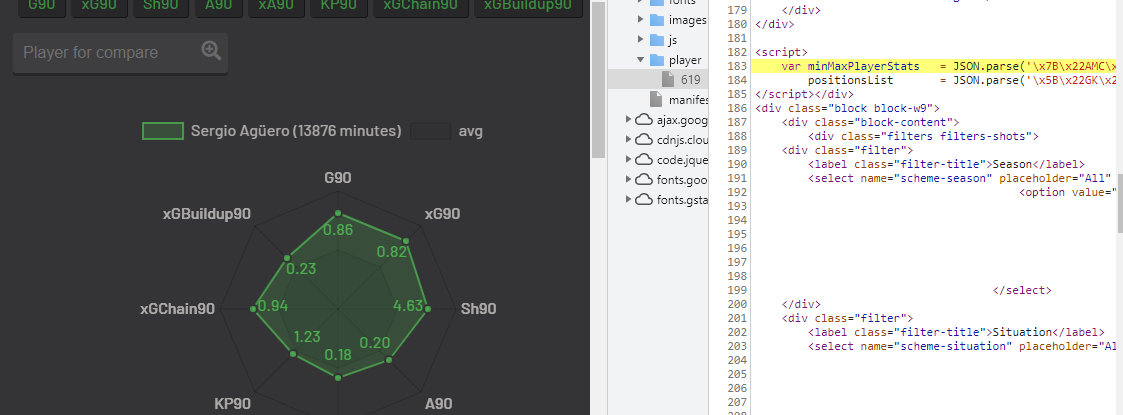

In [18]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/player/8260"
driver.get(link)
# select the shot data 
haaland_min_max = driver.execute_script('return minMaxPlayerStats;')
# close the driver 
driver.close()

In [19]:
df = pd.DataFrame(haaland_min_max)
df['FW'].apply(pd.Series)

,avg,max,min
assists,0.001400,0.004800,0.000000
goals,0.004200,0.012600,0.001100
key_passes,0.012000,0.030900,0.003600
shots,0.028000,0.073700,0.015000
xA,0.001316,0.005382,0.000264
xG,0.004155,0.012082,0.001728
xGBuildup,0.001318,0.006713,0.000243
xGChain,0.005338,0.016914,0.002727


----

<a id="4."></a>
# 4. Match data

After scraping the grouped stats, the players shot and the radars data, we'll proceed to scrape all the data available from Understat using the matches ID.



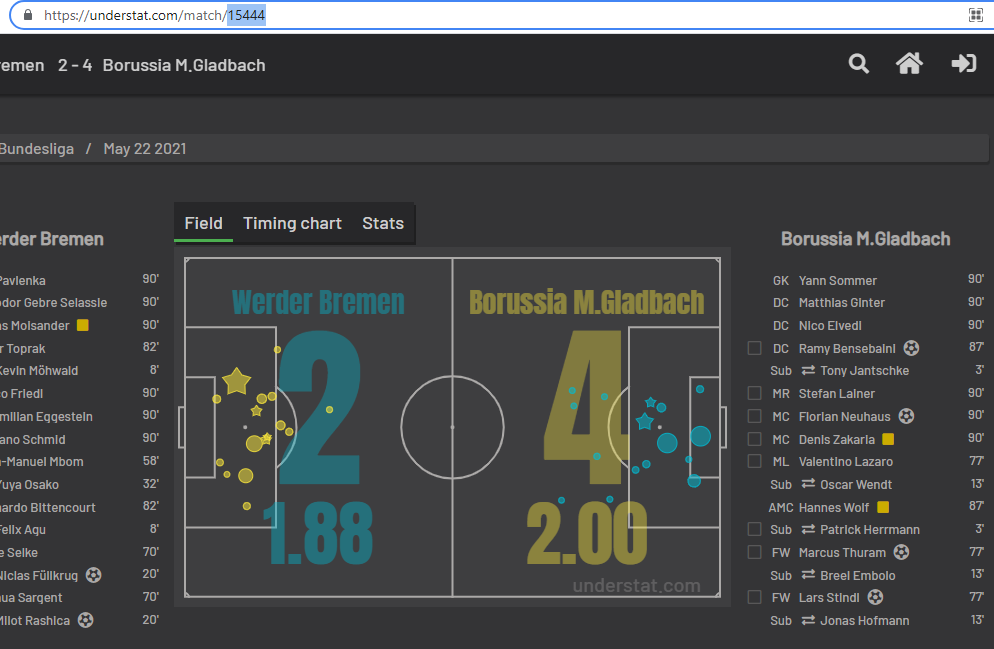

<a id="4.1"></a>
## 4.1. Shots

Using the same procedure as before , we must click right and inspect, after that step click on console and then F5 to reload the page. After the page is reloaded we must search for the the first executable script, in this case **shotsData** 

Remember, instead execute scripts[1][2] etc like in beautiful soup , we execute their variables 



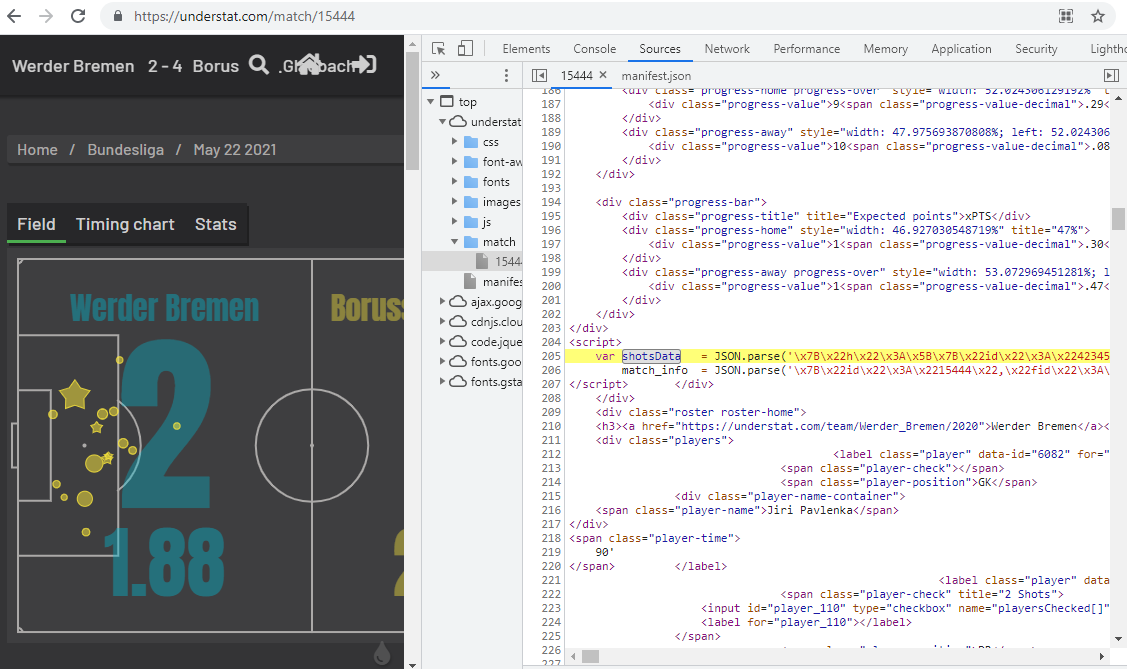

In [7]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/match/15438"
driver.get(link)
# select the shot data 
shots_match = driver.execute_script('return shotsData;')
# close the driver 
driver.close()

Once again the data is nested in home and away teams so in this case to visualize it better we must a DataFrame and merge them together, the "h" and "a".

In [19]:
# create the dataframe
df = pd.DataFrame(shots_match['h'])
match_shots = df.append(pd.DataFrame(shots_match['a']))
match_shots


,X,Y,a_goals,a_team,date,h_a,h_goals,h_team,id,lastAction,match_id,minute,player,player_assisted,player_id,result,season,shotType,situation,xG
0,0.9130000305175782,0.6580000305175782,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423631,Throughball,15438,4,Erling Haaland,Reinier,8260,Goal,2020,LeftFoot,OpenPlay,0.1182284951210022
1,0.860999984741211,0.44,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423640,Pass,15438,43,Marco Reus,Erling Haaland,319,BlockedShot,2020,RightFoot,OpenPlay,0.10691629350185394
2,0.8440000152587891,0.8019999694824219,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423641,Standard,15438,50,Marco Reus,None,319,Goal,2020,RightFoot,DirectFreekick,0.056496791541576385
3,0.8290000152587891,0.40299999237060546,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423642,Chipped,15438,55,Lukasz Piszczek,Julian Brandt,310,MissedShots,2020,Head,OpenPlay,0.03390989452600479
4,0.7730000305175782,0.59,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423643,Pass,15438,59,Jude Bellingham,Nico Schulz,8824,MissedShots,2020,LeftFoot,OpenPlay,0.027648231014609337
5,0.860999984741211,0.615,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423647,Pass,15438,68,Jude Bellingham,Reinier,8824,MissedShots,2020,RightFoot,OpenPlay,0.10660426318645477
6,0.8819999694824219,0.590999984741211,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423649,Pass,15438,71,Erling Haaland,Nico Schulz,8260,MissedShots,2020,LeftFoot,OpenPlay,0.12711219489574432
7,0.8690000152587891,0.4809999847412109,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423652,TakeOn,15438,81,Jadon Sancho,None,6345,BlockedShot,2020,RightFoot,OpenPlay,0.17899954319000244
8,0.9440000152587891,0.43099998474121093,1,Bayer Leverkusen,2021-05-22 13:30:00,h,3,Borussia Dortmund,423653,TakeOn,15438,83,Erling Haaland,None,8260,Goal,2020,LeftFoot,OpenPlay,0.8738992810249329
0,0.9119999694824219,0.41,1,Bayer Leverkusen,2021-05-22 13:30:00,a,3,Borussia Dortmund,423632,Cross,15438,21,Paulinho,Karim Bellarabi,7067,MissedShots,2020,Head,OpenPlay,0.06763546913862228


And now we have successfully scraped every single shot in Dortmund vs Leverkusen match

<a id="4.1"></a>
## 4.2 Match stats

Now let's proceed to scrape the match's basic info such as chances, goals, deep passes , ppda etc. 

For it let's select right under shotsData, **Match_info**

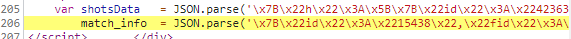

In [21]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/match/15438"
driver.get(link)
# select the shot data 
match_info = driver.execute_script('return match_info;')
# close the driver 
driver.close()

To visualize it better let's create first a series and then turn it into a DataFrame 


In [25]:
match_info.keys()

dict_keys(['a', 'a_deep', 'a_goals', 'a_ppda', 'a_shot', 'a_shotOnTarget', 'a_xg', 'date', 'fid', 'h', 'h_d', 'h_deep', 'h_goals', 'h_l', 'h_ppda', 'h_shot', 'h_shotOnTarget', 'h_w', 'h_xg', 'id', 'league', 'league_id', 'season', 'team_a', 'team_h'])

In [30]:
ser = pd.Series(match_info)

In [32]:
pd.DataFrame(ser).T

,a,a_deep,a_goals,a_ppda,a_shot,a_shotOnTarget,a_xg,date,fid,h,...,h_shot,h_shotOnTarget,h_w,h_xg,id,league,league_id,season,team_a,team_h
0,119,8,1,19.1905,16,7,1.56956,2021-05-22 13:30:00,1481294,129,...,9,3,0.3609,1.62981,15438,Bundesliga,3,2020,Bayer Leverkusen,Borussia Dortmund


<a id="4.3"></a>
## 4.3 Players match info

If we want instead of scraping the entire data for all the matches as done before , we can scrape all the players data for this specific match, in other words the roster data for these two teams : 

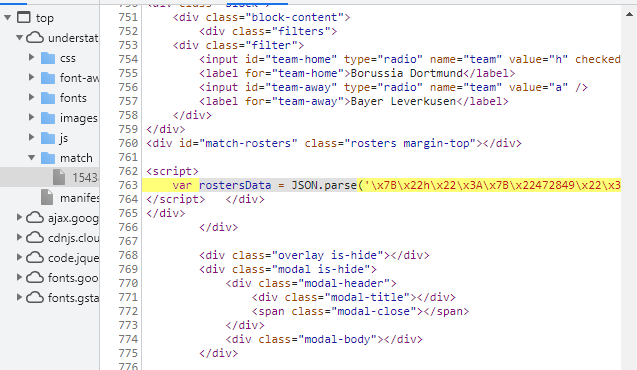


In [3]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/match/15438"
driver.get(link)
# select the shot data 
rosters_data = driver.execute_script('return rostersData;')
# close the driver 
driver.close()

In [6]:
df = pd.DataFrame(rosters_data["h"]).T
df.columns

Index(['assists', 'goals', 'h_a', 'id', 'key_passes', 'own_goals', 'player',
       'player_id', 'position', 'positionOrder', 'red_card', 'roster_in',
       'roster_out', 'shots', 'team_id', 'time', 'xA', 'xG', 'xGBuildup',
       'xGChain', 'yellow_card'],
      dtype='object')

Now we have the entire match data for the entire Borussia Dortmund roster

In [7]:
df

,assists,goals,h_a,id,key_passes,own_goals,player,player_id,position,positionOrder,...,roster_in,roster_out,shots,team_id,time,xA,xG,xGBuildup,xGChain,yellow_card
472849,0,0,h,472849,0,0,Roman Bürki,309,GK,1,...,0,0,0,129,90,0,0,0,0,0
472850,0,0,h,472850,0,0,Lukasz Piszczek,310,DR,2,...,472861,0,1,129,75,0,0.03390989452600479,0.12711219489574432,0.16102208197116852,0
472851,0,0,h,472851,0,0,Emre Can,604,DC,3,...,0,0,0,129,90,0,0,0.12711219489574432,0.12711219489574432,0
472852,0,0,h,472852,0,0,Manuel Akanji,6490,DC,3,...,472860,0,0,129,63,0,0,0,0,0
472853,0,0,h,472853,2,0,Nico Schulz,433,DL,4,...,0,0,0,129,90,0.1547604203224182,0,0.2676263451576233,0.2952745854854584,0
472854,0,0,h,472854,0,0,Thomas Delaney,5230,DMC,7,...,0,0,0,129,90,0,0,0.12711219489574432,0.12711219489574432,0
472855,0,0,h,472855,0,0,Mahmoud Dahoud,205,DMC,7,...,472863,0,0,129,46,0,0,0.1182284951210022,0.1182284951210022,0
472856,0,0,h,472856,1,0,Julian Brandt,261,AMR,11,...,0,0,0,129,90,0.03390989452600479,0,0.2792505919933319,0.2792505919933319,0
472857,1,0,h,472857,2,0,Reinier,8825,AMC,12,...,472862,0,0,129,79,0.22483275830745697,0,0.10691629350185394,0.3317490518093109,0
472858,0,1,h,472858,0,0,Marco Reus,319,AML,13,...,472864,0,2,129,63,0,0.16341309249401093,0.03390989452600479,0.14082619547843933,0


<a id="5."></a>
# 5. Get fixtures for Bundesliga, La Liga , EPL , Calcio , Ligue 1 and Russian League

Now using another link , each leagues respective links , we are going to scrape fixtures, tables and the players data

In [20]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the Bundesliga link using get fucntion
link = "https://understat.com/league/Bundesliga"
driver.get(link)
# select the shot data 
bundesliga_fixtures = driver.execute_script('return datesData;')
# close the driver 
driver.close()

In [21]:
df = pd.DataFrame(bundesliga_fixtures)
df.columns

Index(['a', 'datetime', 'forecast', 'goals', 'h', 'id', 'isResult', 'numbers',
       'xG'],
      dtype='object')

In [22]:
type(bundesliga_fixtures)

list

In [23]:
df['numbers'].apply(pd.Series)

,dateTime,day,hours,minutes,month,week,year
0,2020-09-18T18:30:00.000Z,18,14,30,9,38,2020
1,2020-09-19T13:30:00.000Z,19,09,30,9,38,2020
2,2020-09-19T13:30:00.000Z,19,09,30,9,38,2020
3,2020-09-19T13:30:00.000Z,19,09,30,9,38,2020
4,2020-09-19T13:30:00.000Z,19,09,30,9,38,2020
...,...,...,...,...,...,...,...
301,2021-05-22T13:30:00.000Z,22,09,30,5,20,2021
302,2021-05-22T13:30:00.000Z,22,09,30,5,20,2021
303,2021-05-22T13:30:00.000Z,22,09,30,5,20,2021
304,2021-05-22T13:30:00.000Z,22,09,30,5,20,2021


In [24]:
df

,a,datetime,forecast,goals,h,id,isResult,numbers,xG
0,"{'id': '124', 'short_title': 'SCH', 'title': '...",2020-09-18 18:30:00,"{'d': '0.0046', 'l': '0.0006', 'w': '0.9948'}","{'a': '0', 'h': '8'}","{'id': '117', 'short_title': 'BAY', 'title': '...",14173,True,"{'dateTime': '2020-09-18T18:30:00.000Z', 'day'...","{'a': '0.14975', 'h': '4.62088'}"
1,"{'id': '262', 'short_title': '', 'title': 'Arm...",2020-09-19 13:30:00,"{'d': '0.1158', 'l': '0.0388', 'w': '0.8454'}","{'a': '1', 'h': '1'}","{'id': '132', 'short_title': 'EIN', 'title': '...",14174,True,"{'dateTime': '2020-09-19T13:30:00.000Z', 'day'...","{'a': '0.618787', 'h': '2.46928'}"
2,"{'id': '121', 'short_title': 'AUG', 'title': '...",2020-09-19 13:30:00,"{'d': '0.2882', 'l': '0.4688', 'w': '0.243'}","{'a': '3', 'h': '1'}","{'id': '240', 'short_title': 'UNI', 'title': '...",14175,True,"{'dateTime': '2020-09-19T13:30:00.000Z', 'day'...","{'a': '1.42046', 'h': '1.04515'}"
3,"{'id': '120', 'short_title': 'HOF', 'title': '...",2020-09-19 13:30:00,"{'d': '0.253', 'l': '0.5017', 'w': '0.2453'}","{'a': '3', 'h': '2'}","{'id': '134', 'short_title': 'COL', 'title': '...",14176,True,"{'dateTime': '2020-09-19T13:30:00.000Z', 'day'...","{'a': '2.9032', 'h': '2.40801'}"
4,"{'id': '122', 'short_title': 'HER', 'title': '...",2020-09-19 13:30:00,"{'d': '0.1641', 'l': '0.7743', 'w': '0.0616'}","{'a': '4', 'h': '1'}","{'id': '123', 'short_title': 'WER', 'title': '...",14177,True,"{'dateTime': '2020-09-19T13:30:00.000Z', 'day'...","{'a': '2.05406', 'h': '0.495892'}"
...,...,...,...,...,...,...,...,...,...
301,"{'id': '135', 'short_title': 'FRE', 'title': '...",2021-05-22 13:30:00,"{'d': '0.1303', 'l': '0.0376', 'w': '0.8321'}","{'a': '1', 'h': '3'}","{'id': '132', 'short_title': 'EIN', 'title': '...",15441,True,"{'dateTime': '2021-05-22T13:30:00.000Z', 'day'...","{'a': '0.525229', 'h': '2.30602'}"
302,"{'id': '136', 'short_title': 'RBL', 'title': '...",2021-05-22 13:30:00,"{'d': '0.1809', 'l': '0.7108', 'w': '0.1083'}","{'a': '1', 'h': '2'}","{'id': '240', 'short_title': 'UNI', 'title': '...",15442,True,"{'dateTime': '2021-05-22T13:30:00.000Z', 'day'...","{'a': '2.4444', 'h': '1.05622'}"
303,"{'id': '124', 'short_title': 'SCH', 'title': '...",2021-05-22 13:30:00,"{'d': '0.1563', 'l': '0.0403', 'w': '0.8034'}","{'a': '0', 'h': '1'}","{'id': '134', 'short_title': 'COL', 'title': '...",15443,True,"{'dateTime': '2021-05-22T13:30:00.000Z', 'day'...","{'a': '0.337227', 'h': '1.98992'}"
304,"{'id': '130', 'short_title': 'BMG', 'title': '...",2021-05-22 13:30:00,"{'d': '0.2372', 'l': '0.4097', 'w': '0.3531'}","{'a': '4', 'h': '2'}","{'id': '123', 'short_title': 'WER', 'title': '...",15444,True,"{'dateTime': '2021-05-22T13:30:00.000Z', 'day'...","{'a': '1.99606', 'h': '1.88004'}"


In [25]:
df[['a','h']].apply(pd.Series)

,a,h
0,"{'id': '124', 'short_title': 'SCH', 'title': '...","{'id': '117', 'short_title': 'BAY', 'title': '..."
1,"{'id': '262', 'short_title': '', 'title': 'Arm...","{'id': '132', 'short_title': 'EIN', 'title': '..."
2,"{'id': '121', 'short_title': 'AUG', 'title': '...","{'id': '240', 'short_title': 'UNI', 'title': '..."
3,"{'id': '120', 'short_title': 'HOF', 'title': '...","{'id': '134', 'short_title': 'COL', 'title': '..."
4,"{'id': '122', 'short_title': 'HER', 'title': '...","{'id': '123', 'short_title': 'WER', 'title': '..."
...,...,...
301,"{'id': '135', 'short_title': 'FRE', 'title': '...","{'id': '132', 'short_title': 'EIN', 'title': '..."
302,"{'id': '136', 'short_title': 'RBL', 'title': '...","{'id': '240', 'short_title': 'UNI', 'title': '..."
303,"{'id': '124', 'short_title': 'SCH', 'title': '...","{'id': '134', 'short_title': 'COL', 'title': '..."
304,"{'id': '130', 'short_title': 'BMG', 'title': '...","{'id': '123', 'short_title': 'WER', 'title': '..."


<a id="6."></a>
# 6. Get table

In [26]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/league/Bundesliga"
driver.get(link)
# select the shot data 
get_table = driver.execute_script('return teamsData;')
# close the driver 
driver.close()

In [27]:
df = pd.DataFrame(get_table)

In [28]:
df1 = pd.DataFrame(df['120'])

In [29]:
get_table.keys()

dict_keys(['117', '119', '120', '121', '122', '123', '124', '125', '129', '130', '131', '132', '133', '134', '135', '136', '240', '262'])

In [30]:
df1['120'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
history,"{'date': '2020-09-19 13:30:00', 'deep': 10, 'd...","{'date': '2020-09-27 13:30:00', 'deep': 6, 'de...","{'date': '2020-10-03 13:30:00', 'deep': 6, 'de...","{'date': '2020-10-17 13:30:00', 'deep': 3, 'de...","{'date': '2020-10-25 17:00:00', 'deep': 5, 'de...","{'date': '2020-11-02 19:30:00', 'deep': 15, 'd...","{'date': '2020-11-08 14:30:00', 'deep': 6, 'de...","{'date': '2020-11-21 14:30:00', 'deep': 4, 'de...","{'date': '2020-11-29 17:00:00', 'deep': 7, 'de...","{'date': '2020-12-07 19:30:00', 'deep': 8, 'de...",...,"{'date': '2021-03-14 17:00:00', 'deep': 9, 'de...","{'date': '2021-03-21 12:30:00', 'deep': 5, 'de...","{'date': '2021-04-03 13:30:00', 'deep': 13, 'd...","{'date': '2021-04-12 18:30:00', 'deep': 3, 'de...","{'date': '2021-04-16 18:30:00', 'deep': 2, 'de...","{'date': '2021-04-21 18:30:00', 'deep': 9, 'de...","{'date': '2021-04-24 13:30:00', 'deep': 4, 'de...","{'date': '2021-05-08 13:30:00', 'deep': 9, 'de...","{'date': '2021-05-15 13:30:00', 'deep': 10, 'd...","{'date': '2021-05-22 13:30:00', 'deep': 19, 'd..."
id,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,Hoffenheim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df1

,120
history,"[{'date': '2020-09-19 13:30:00', 'deep': 10, '..."
id,120
title,Hoffenheim


In [32]:
get_table.keys()

dict_keys(['117', '119', '120', '121', '122', '123', '124', '125', '129', '130', '131', '132', '133', '134', '135', '136', '240', '262'])

In [33]:
a = get_table['117']

In [34]:
b = a['history']

In [35]:
type(b)

list

In [36]:
pd.DataFrame(b)

,date,deep,deep_allowed,draws,h_a,loses,missed,npxG,npxGA,npxGD,ppda,ppda_allowed,pts,result,scored,wins,xG,xGA,xpts
0,2020-09-18 18:30:00,24,3,0,h,0,0,3.863110,0.149750,3.713360,"{'att': 203, 'def': 32}","{'att': 380, 'def': 15}",3,w,8,1,4.620880,0.149750,2.9890
1,2020-09-27 13:30:00,11,6,0,a,1,4,1.173110,1.765620,-0.592510,"{'att': 99, 'def': 17}","{'att': 341, 'def': 26}",0,l,1,0,1.173110,2.523390,0.5204
2,2020-10-04 16:00:00,11,1,0,h,0,3,3.235330,1.245090,1.990240,"{'att': 157, 'def': 38}","{'att': 280, 'def': 23}",3,w,4,1,3.993110,1.245090,2.8150
3,2020-10-17 16:30:00,16,4,0,a,0,1,3.294470,1.212350,2.082120,"{'att': 223, 'def': 30}","{'att': 416, 'def': 12}",3,w,4,1,3.294470,1.212350,2.6202
4,2020-10-24 13:30:00,12,1,0,h,0,0,3.808230,0.429229,3.379001,"{'att': 220, 'def': 22}","{'att': 372, 'def': 22}",3,w,5,1,3.808230,0.429229,2.9200
5,2020-10-31 14:30:00,9,2,0,a,0,1,0.235150,0.681548,-0.446398,"{'att': 207, 'def': 36}","{'att': 404, 'def': 14}",3,w,2,1,0.992927,0.681548,1.7206
6,2020-11-07 17:30:00,7,9,0,a,0,2,1.336210,2.308810,-0.972600,"{'att': 302, 'def': 34}","{'att': 252, 'def': 21}",3,w,3,1,1.336210,2.308810,0.7124
7,2020-11-21 14:30:00,18,4,1,h,0,1,1.673600,1.631040,0.042560,"{'att': 129, 'def': 33}","{'att': 266, 'def': 16}",1,d,1,0,1.673600,1.631040,1.3699
8,2020-11-28 14:30:00,11,5,0,a,0,1,0.889035,1.386660,-0.497625,"{'att': 250, 'def': 34}","{'att': 333, 'def': 23}",3,w,3,1,0.889035,1.386660,0.9438
9,2020-12-05 17:30:00,6,1,1,h,0,3,1.000470,1.564920,-0.564450,"{'att': 237, 'def': 19}","{'att': 345, 'def': 15}",1,d,3,0,1.000470,1.564920,0.8611


-----

<a id="7."></a>
# 7. Scrape Bundesliga rosters

In [41]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/league/Bundesliga"
driver.get(link)
# select the shot data 
all_players_data = driver.execute_script('return playersData;')
# close the driver 
driver.close()

In [48]:
players_data = pd.DataFrame(all_players_data)
players_data.set_index('player_name',inplace=True)

In [49]:
players_data

,assists,games,goals,id,key_passes,npg,npxG,position,red_cards,shots,team_title,time,xA,xG,xGBuildup,xGChain,yellow_cards
player_name,,,,,,,,,,,,,,,,,
Robert Lewandowski,7,29,41,227,32,33,25.257361985743046,F S,0,135,Bayern Munich,2467,4.8155501037836075,32.07735199481249,5.689343474805355,31.74017623066902,4
André Silva,5,32,28,6170,31,21,20.2947915866971,F,0,114,Eintracht Frankfurt,2787,5.467086249962449,25.599147878587246,4.096429200842977,26.746570186689496,1
Erling Haaland,6,28,27,8260,27,25,20.53943706303835,F S,0,92,Borussia Dortmund,2416,4.035449907183647,23.57054380327463,5.896184146404266,27.197274826467037,2
Andrej Kramaric,5,28,20,956,38,15,11.736724071204662,F M S,0,95,Hoffenheim,2386,4.072423195466399,15.525607608258724,5.372288113459945,18.05768978781998,2
Wout Weghorst,8,34,20,7052,45,18,16.03705950640142,F S,0,93,Wolfsburg,2954,5.427308417856693,18.31038965843618,5.954851500689983,24.294339487329125,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mohamed Sankoh,0,1,0,9494,0,0,0,S,0,0,VfB Stuttgart,15,0,0,0,0,0
Jimmy Adrian Kaparos,0,1,0,9507,0,0,0,S,0,0,Schalke 04,15,0,0,0,0,0
Marten Winkler,0,1,0,9528,0,0,0,S,0,0,Hertha Berlin,1,0,0,0,0,0


In [51]:
# It's also possible to filter the data to obtain specific roster
dortmund_roster = players_data[players_data['team_title']=='Borussia Dortmund']
dortmund_roster

,assists,games,goals,id,key_passes,npg,npxG,position,red_cards,shots,team_title,time,xA,xG,xGBuildup,xGChain,yellow_cards
player_name,,,,,,,,,,,,,,,,,
Erling Haaland,6,28,27,8260,27,25,20.53943706303835,F S,0,92,Borussia Dortmund,2416,4.035449907183647,23.57054380327463,5.896184146404266,27.197274826467037,2
Marco Reus,6,32,8,319,49,8,9.667922407388687,F M S,0,56,Borussia Dortmund,2313,7.840978126972914,11.011218816041946,9.797888366505504,20.42278859578073,1
Jadon Sancho,11,26,8,6345,67,7,5.989828230813146,F M S,0,52,Borussia Dortmund,2083,8.235949086025357,6.747604915872216,10.953153274953365,20.967298910021782,0
Mats Hummels,0,33,5,373,13,5,5.321491051465273,D S,0,30,Borussia Dortmund,2819,0.697302732616663,5.321491051465273,15.705600760877132,17.52257899940014,6
Raphael Guerreiro,10,27,5,3455,55,5,3.6568777058273554,D M S,0,37,Borussia Dortmund,2226,7.402737466618419,3.6568777058273554,15.190963014960289,21.82300715148449,1
Giovanni Reyna,5,32,4,8191,35,4,4.295198937878013,M S,0,38,Borussia Dortmund,1985,4.956997659057379,4.295198937878013,8.147430300712585,14.308373365551233,1
Julian Brandt,2,31,3,261,31,3,2.841085519641638,F M S,0,22,Borussia Dortmund,1485,2.499097330495715,2.841085519641638,10.011154336854815,14.69190658070147,0
Youssoufa Moukoko,0,14,3,9133,2,3,2.2534767240285873,F S,0,20,Borussia Dortmund,394,0.7388399988412857,2.2534767240285873,1.2229013461619616,4.1390052773058414,0
Manuel Akanji,0,28,2,6490,3,2,1.9763391818851233,D S,0,19,Borussia Dortmund,2350,0.20792259462177753,1.9763391818851233,10.379092287272215,10.612564351409674,4


<a id="8."></a>
# 8. Stats for every league

In [52]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
link = "https://understat.com/"
driver.get(link)
# select the shot data 
league_stats = driver.execute_script('return statData;')
# close the driver 
driver.close()

In [53]:
# creating the DataFrame
league_stats = pd.DataFrame(league_stats)
league_stats

,a,axg,h,hxg,league,league_id,matches,month,year
0,1.1250,1.016120968464141,1.4583,1.450178946678837,RFPL,6,48,8,2014
1,0.9750,0.9339336020871997,1.4750,1.495286364853382,Ligue 1,5,40,8,2014
2,1.4000,1.110964298248291,1.3000,1.141921697060267,EPL,1,30,8,2014
3,1.2778,1.1841687113046646,1.2222,1.3938495301538043,Bundesliga,3,18,8,2014
4,0.6000,1.1404528498649598,1.1000,1.2038853943347931,Serie A,2,10,8,2014
...,...,...,...,...,...,...,...,...,...
403,1.5385,1.2401349419393601,1.4359,1.4968860955574574,Ligue 1,5,39,5,2021
404,1.4000,1.4067597538232803,1.9667,1.6470815226435662,Bundesliga,3,30,5,2021
405,1.1633,1.1239239129484917,1.4898,1.2697908978681176,La liga,4,49,5,2021
406,1.4902,1.4349464090431439,1.4902,1.4346774836965637,EPL,1,51,5,2021
